## About:

In this notebook we create a line of sight (LOS) based in the read_eagle function. For it we must use simulation data from an eagle-like with hash tables. And we indicate in the parameter file read_eagle as True

---

In [26]:
import reading_data_for_los as RD
from read_parameter_file import read_params
import h5py as h5
import matplotlib.pyplot as plt

In [53]:
print(read_eagle.__file__)

/cosma/home/dp004/dc-aram1/.local/lib/python3.9/site-packages/pyread_eagle/__init__.py


In [27]:
parameters = read_params('dummy.par')

Error at parameter file in : integrate_kernel: 0

Error at parameter file in : use_gaussian_kernel: 0



In [28]:
header = RD.read_header(parameters)

In [29]:
#modify some parameters to not change the parameter file that would have conflic with the configuration for the main notebook
parameters.datadir = "/cosma7/data/Eagle/ScienceRuns/Planck1/L0012N0188/PE/REFERENCE/data/snapshot_028_z000p000/"
parameters.snap_base = "snap_028_z000p000"

parameters.read_eagle = True
parameters.use_los_file = False

### Using coordinate.hdf5

In [30]:
print(parameters.read_eagle)
print(parameters.use_random_los)

True
False


In [31]:
header = RD.read_header(parameters)

In [32]:
los = RD.read_particle_data(parameters,header,0)

In [33]:
xx = (los.Position[:,0] * header.ExpansionFactor / header.HubbleParam)
zz = (los.Position[:,2] * header.ExpansionFactor / header.HubbleParam)

(0.0, 12.5)

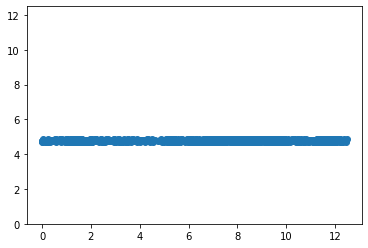

In [34]:
plt.scatter(zz,xx)
plt.ylim(0,header.BoxSize / header.HubbleParam)

### Using Random (x,y)

In [39]:
parameters.use_random_los = True
header = RD.read_header(parameters)

In [40]:
#Here adding the LOS number is optional
los = RD.read_particle_data(parameters,header)

In [41]:
xx = (los.Position[:,0] * header.ExpansionFactor / header.HubbleParam)
zz = (los.Position[:,2] * header.ExpansionFactor / header.HubbleParam)

(0.0, 12.5)

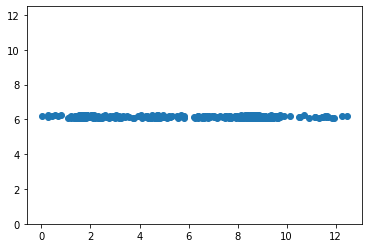

In [42]:
plt.scatter(zz,xx)
plt.ylim(0,header.BoxSize / header.HubbleParam)